### Bibliotecas necessárias 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy as sp

import jax.numpy as jnp
from jax import random, jit, vmap
import jax.scipy as jsp

import matplotlib.pyplot as plt

#para carregar o .mat 
from scipy.io import loadmat

In [3]:
##### Carregamento dos datasets #####

GC = loadmat('GC_LFPs.mat')
LFP = loadmat('LFP_HG_HFO.mat')

In [4]:
print(GC.keys())
print(LFP.keys())

print(f"SHAPE: {GC['LFP'].shape}")
print(f"SHAPE lfpHFO: {LFP['lfpHFO'].shape} SHAPE lfpHG: {LFP['lfpHG'].shape}")

dict_keys(['__header__', '__version__', '__globals__', 'LFP'])
dict_keys(['__header__', '__version__', '__globals__', 'lfpHFO', 'lfpHG'])
SHAPE: (144, 3500)
SHAPE lfpHFO: (1, 300000) SHAPE lfpHG: (1, 300000)


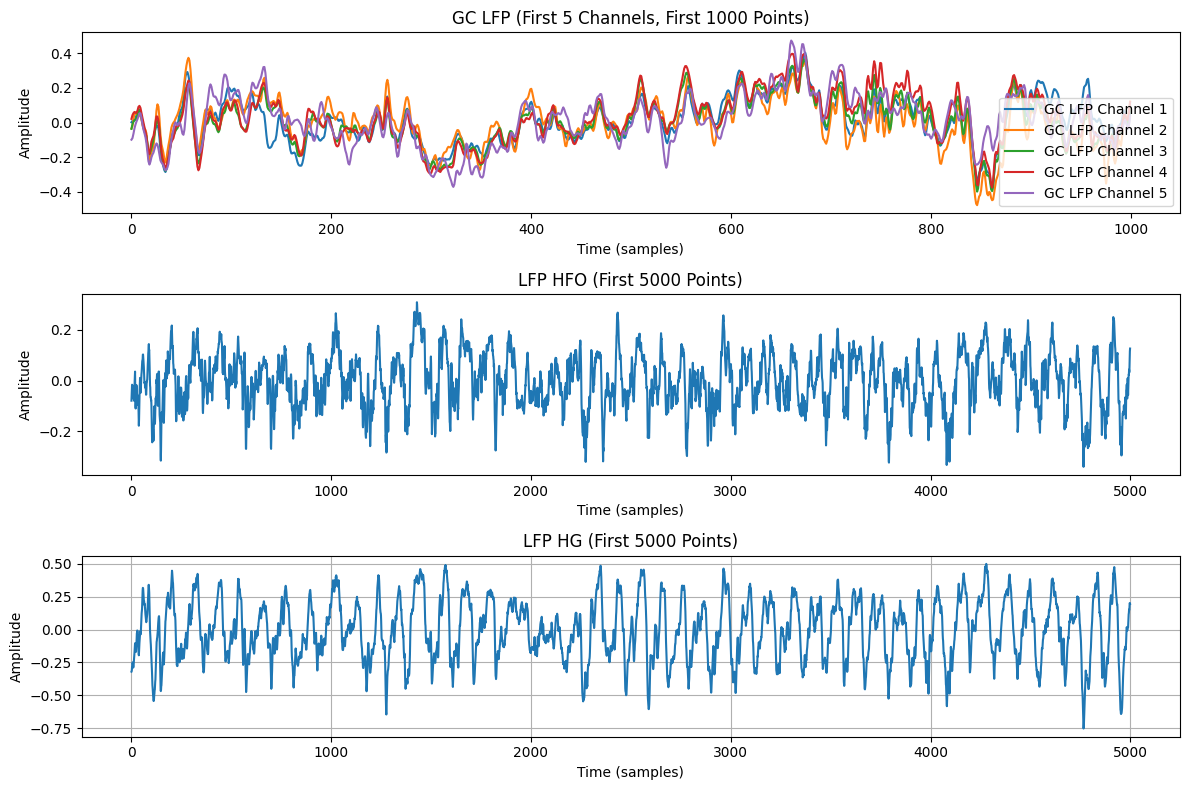

In [6]:
fig, ax = plt.subplots(3, 1, figsize=(12, 8)) 

num_channels_to_plot = 5
data_points_to_plot_gc = 1000

for i in range(min(num_channels_to_plot, GC['LFP'].shape[0])): 
    ax[0].plot(GC['LFP'][i, :data_points_to_plot_gc].T, label=f'GC LFP Channel {i+1}')
ax[0].set_title(f'GC LFP (First {num_channels_to_plot} Channels, First {data_points_to_plot_gc} Points)')
ax[0].set_xlabel('Time (samples)') 
ax[0].set_ylabel('Amplitude')
ax[0].legend() 


data_points_to_plot_lfp = 5000
ax[1].plot(LFP['lfpHFO'][0, :data_points_to_plot_lfp], label='LFP HFO') 
ax[1].set_title(f'LFP HFO (First {data_points_to_plot_lfp} Points)')
ax[1].set_xlabel('Time (samples)')
ax[1].set_ylabel('Amplitude')


ax[2].plot(LFP['lfpHG'][0, :data_points_to_plot_lfp], label='LFP HG') 
ax[2].set_title(f'LFP HG (First {data_points_to_plot_lfp} Points)')
ax[2].set_xlabel('Time (samples)')
ax[2].set_ylabel('Amplitude')

plt.tight_layout()
plt.grid(True)
plt.show()

[-0.07958984 -0.05908203 -0.03564453 ...  0.11328125  0.12988281
  0.12353516]
[-0.3203125  -0.31738281 -0.30712891 ...  0.16015625  0.16552734
  0.17041016]


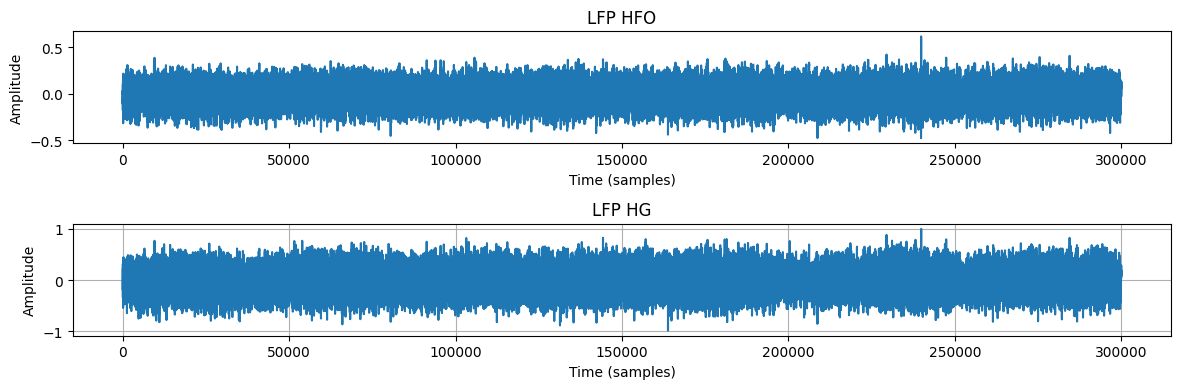

In [8]:
print(LFP['lfpHFO'][0, :])

print(LFP['lfpHG'][0, :])

fig , ax = plt.subplots(2, 1, figsize=(12, 4))

ax[0].plot(LFP['lfpHFO'][0, :], label='LFP HFO')
ax[0].set_title('LFP HFO')
ax[0].set_xlabel('Time (samples)')
ax[0].set_ylabel('Amplitude')
ax[1].plot(LFP['lfpHG'][0, :], label='LFP HG')
ax[1].set_title('LFP HG')
ax[1].set_xlabel('Time (samples)')
ax[1].set_ylabel('Amplitude')
plt.tight_layout()
plt.grid(True)
plt.show()

### Questões 1-5

Dataset LFP_HFO_HG

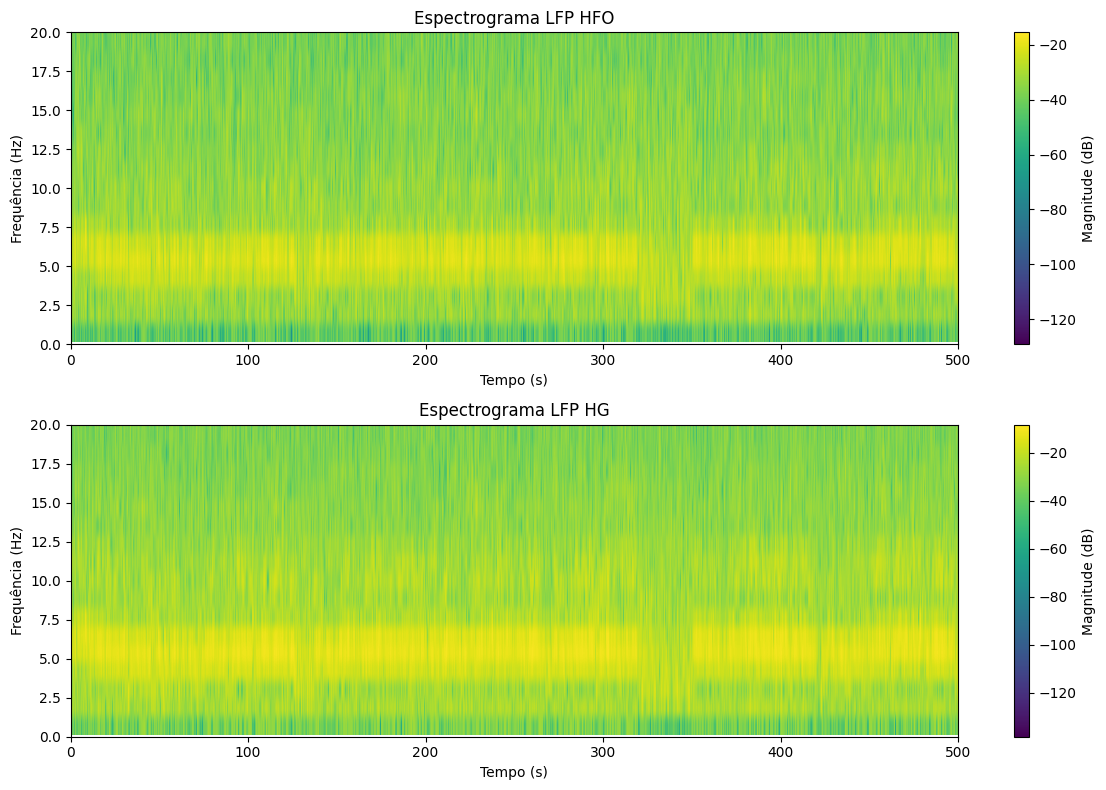

In [9]:
### Computando o TFD espectrograma ### 

lfp = LFP['lfpHFO'][0, :]
hg = LFP['lfpHG'][0, :]



tfd_hfo = sp.signal.spectrogram(
    lfp,
    fs=1000,  # Frequência de amostragem
    nperseg=256,  # Tamanho da janela
    noverlap=128,  # Sobreposição entre janelas
    nfft=512,  # Tamanho da FFT
    scaling='spectrum'  # Escala do espectro
)

tfd_hg = sp.signal.spectrogram(
    hg,
    fs=1000,  # Frequência de amostragem
    nperseg=256,  # Tamanho da janela
    noverlap=128,  # Sobreposição entre janelas
    nfft=512,  # Tamanho da FFT
    scaling='spectrum'  # Escala do espectro
)

# Plotando o espectrograma
fig , ax = plt.subplots(2, 1, figsize=(12, 8))
ax[0].imshow(10 * np.log10(tfd_hfo[2]), aspect='auto', origin='lower', 
           extent=[tfd_hfo[0][0], tfd_hfo[0][-1], tfd_hfo[1][0], tfd_hfo[1][-1]])
ax[0].set_title('Espectrograma LFP HFO')
ax[0].set_xlabel('Tempo (s)')
ax[0].set_ylabel('Frequência (Hz)')
ax[0].set_ylim(0,20) #hz

ax[1].imshow(10 * np.log10(tfd_hg[2]), aspect='auto', origin='lower', 
           extent=[tfd_hg[0][0], tfd_hg[0][-1], tfd_hg[1][0], tfd_hg[1][-1]])
ax[1].set_title('Espectrograma LFP HG')
ax[1].set_xlabel('Tempo (s)')
ax[1].set_ylabel('Frequência (Hz)')
ax[1].set_ylim(0,20) #hz
plt.colorbar(ax[0].images[0], ax=ax[0], label='Magnitude (dB)')
plt.colorbar(ax[1].images[0], ax=ax[1], label='Magnitude (dB)')
plt.tight_layout()
plt.show()